In [64]:
import tensorflow as tf
import pandas as pd

# 데이터 불러오기

In [65]:
D=pd.read_excel("http://data.hossam.kr/F02/fish2.xlsx")
data=pd.DataFrame(D)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   길이      56 non-null     float64
 1   높이      56 non-null     float64
 2   두께      56 non-null     float64
 3   무게      56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


# Data 시각화

은닉층의 개수는 기계가 정하지 않습니다-> 애초에 설명이 굉장히 잘못됐다

In [67]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams["font.family"]="BM YEONSUNG"
plt.rcParams["axes.unicode_minus"]=False

In [68]:
# plt.figure()
# sb.pairplot(data)
# plt.show()
# plt.close()

c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


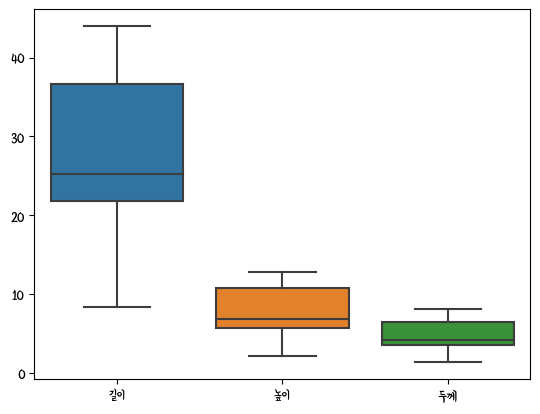

In [69]:
plt.figure()
sb.boxplot(data[data.columns.difference(["무게"])])
plt.show()
plt.close()

* 주의사항          
이전 예제의 풀이들을 통해 이들 사이에 다중공선성 문제가 발생하여 하나의 feature만 사용하여 결정했었었다.            
하지만 이번에 은닉층의 개수를 늘려보는 연습을 위해 다중공선성 문제를 무시한채 해결해보겠다

## 모델 만들기

In [70]:
import tensorflow.keras as keras

#### 팁!
퍼셉트론은 output의 개수가 1개입니다. input의 개수는 상관이 없어요          
Dense에서의 숫자는 output할 퍼셉트론의 개수를 이야기합니다

In [71]:
# 나는 인공신경망 모델을 만들건데 단순히 쌓아서 만들거야
model=keras.models.Sequential()
# 너에게 나는 어떤 값들을 줄건데 그 (feature)

# Dense : input의 개수를 이야기해야하고 이건 사람의 영역이다
# -> 2차를 만들고 싶기 때문에 27개의 컬럼이 생성될것으로 예측

# 입력레이어
model.add(keras.layers.Dense(32,activation="relu",input_shape=(10,)))

# 이 아이가 은닉층입니다
model.add(keras.layers.Dense(16,activation="linear"))
model.add(keras.layers.Dense(8,activation="linear"))
model.add(keras.layers.Dense(4,activation="linear"))
model.add(keras.layers.Dense(2,activation="linear"))

# 출력 : Dense=1 무조건 출력층
model.add(keras.layers.Dense(1,activation="linear"))
model.compile(optimizer='adam',loss="mse",metrics=["mse"])

## 2차를 예상하고 데이터 프레임을 바꾸겠다

In [72]:
import sklearn.preprocessing as skpre

In [73]:
poly=skpre.PolynomialFeatures()

In [74]:
pre_data_x=pd.DataFrame(poly.fit_transform(data[data.columns.difference(["무게"])]),columns=poly.get_feature_names_out())

In [75]:
pre_data_x.head(3)

,1,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2
0,1.0,8.4,2.11,1.41,70.56,17.724,11.844,4.4521,2.9751,1.9881
1,1.0,13.7,3.53,2.00,187.69,48.361,27.400,12.4609,7.0600,4.0000
2,1.0,15.0,3.82,2.43,225.00,57.300,36.450,14.5924,9.2826,5.9049


In [76]:
import sklearn.model_selection as skmod
import numpy as np
np.random.seed(10)

In [77]:
train_y,test_y,train_x,test_x=skmod.train_test_split(data["무게"],pre_data_x,train_size=0.8,random_state=10)

In [78]:
result=model.fit(train_x,train_y,epochs=300,validation_data=(test_x,test_y))

Epoch 1/300


2/2 [==============================] - 2s 353ms/step - loss: 2062484.3750 - mse: 2062484.3750 - val_loss: 795103.6875 - val_mse: 795103.6875
Epoch 2/300
2/2 [==============================] - 0s 80ms/step - loss: 1730166.8750 - mse: 1730166.8750 - val_loss: 641796.2500 - val_mse: 641796.2500
Epoch 3/300
2/2 [==============================] - 0s 136ms/step - loss: 1404071.7500 - mse: 1404071.7500 - val_loss: 510936.7500 - val_mse: 510936.7500
Epoch 4/300
2/2 [==============================] - 0s 88ms/step - loss: 1125312.8750 - mse: 1125312.8750 - val_loss: 398314.9062 - val_mse: 398314.9062
Epoch 5/300
2/2 [==============================] - 0s 81ms/step - loss: 882301.4375 - mse: 882301.4375 - val_loss: 302321.5312 - val_mse: 302321.5312
Epoch 6/300
2/2 [==============================] - 0s 78ms/step - loss: 687760.9375 - mse: 687760.9375 - val_loss: 222044.5625 - val_mse: 222044.5625
Epoch 7/300
2/2 [==============================] - 0s 71ms/step - loss: 509206.0312 - mse: 509206.0312

In [79]:
df=pd.DataFrame(result.history)

c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

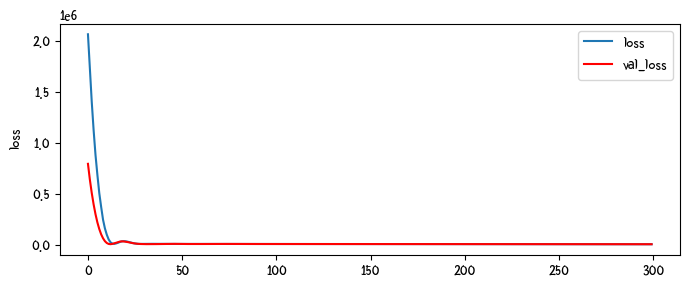

In [80]:
plt.figure(figsize=(8,3))
sb.lineplot(data=df,x=df.index,y='loss',label="loss")
sb.lineplot(data=df,x=df.index,y='val_loss',label="val_loss",color="red")
plt.show()
plt.close()

In [81]:
pred_train=model.predict(train_x).squeeze()
pred_test=model.predict(test_x).squeeze()

1/1 [==============================] - 0s 36ms/step


c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

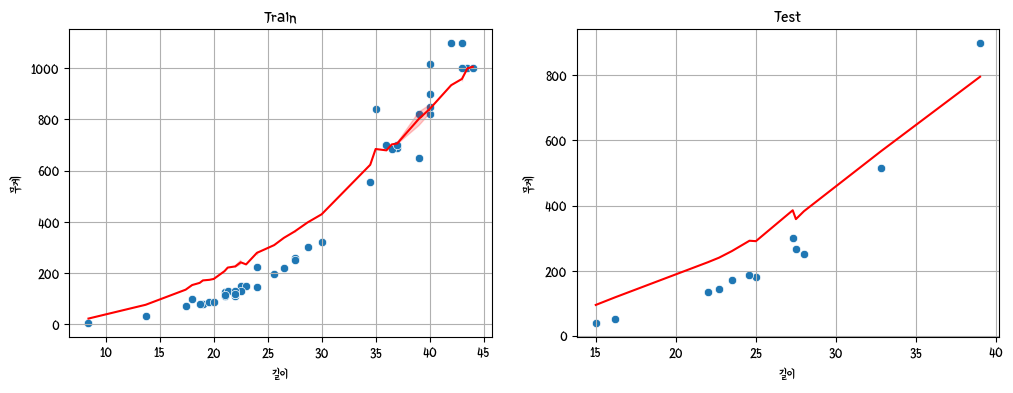

In [82]:
_,a=plt.subplots(1,2,figsize=(12,4))
sb.scatterplot(x=train_x["길이"],y=train_y,ax=a[0])
sb.lineplot(x=train_x["길이"],y=pred_train,ax=a[0],color="red")
sb.scatterplot(x=test_x["길이"],y=test_y,ax=a[1])
sb.lineplot(x=test_x["길이"],y=pred_test,ax=a[1],color="red")
a[0].grid()
a[0].set_title("Train")
a[1].grid()
a[1].set_title("Test")
plt.show()
plt.close()

### 참고
모델의 성능향상을 위해 target 변수의 스케일링을 실시할 수 았음            
이때 해석에 유의해야함